Sources:<br />
    https://realpython.com/logistic-regression-python/,<br />
    https://github.com/kubapok/umz-template/tree/master/zajecia2/zadanie1,<br />
    https://scikit-learn.org/0.21/auto_examples/model_selection/plot_confusion_matrix.html.

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E703

In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

The plot_confusion_matrix is available from the version 0.22 of scikit. 
For an older release we have to use following definition.

In [3]:
try:
    from sklearn.metrics import plot_confusion_matrix
except(ImportError):
    from sklearn.utils.multiclass import unique_labels

    def plot_confusion_matrix(y_true, y_pred, classes,
                              normalize=False,
                              title=None,
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
        classes = classes[unique_labels(y_true, y_pred)]
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        plt.xlim(-0.5, len(classes)-0.5)
        plt.ylim(len(classes)-0.5, -0.5)
        return ax

In [4]:
data_file = os.path.join('data', 'train.tsv')
test_data_file = os.path.join('data', 'test.tsv')
results_file = os.path.join('data', 'results.tsv')
output_file = os.path.join('data', 'out.tsv')

In [5]:
df_names = ['Occupancy', 'Date', 'Temperature', 'Humidity',
            'Light', 'CO2', 'HumidityRatio']

df = pd.read_csv(data_file, sep='\t', names=df_names)
df = df.dropna()

In [6]:
df.describe()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,0.212330,20.619084,25.731507,119.519375,606.546243,0.003863
std,0.408982,1.016916,5.531211,194.755805,314.320877,0.000852
min,0.000000,19.000000,16.745000,0.000000,412.750000,0.002674
25%,0.000000,19.700000,20.200000,0.000000,439.000000,0.003078
50%,0.000000,20.390000,26.222500,0.000000,453.500000,0.003801
75%,0.000000,21.390000,30.533333,256.375000,638.833333,0.004352
max,1.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476


In [7]:
df.head(20)

,Occupancy,Date,Temperature,Humidity,Light,CO2,HumidityRatio
0,1,2015-02-04 17:51:00,23.180,27.272000,426.0,721.250000,0.004793
1,1,2015-02-04 17:51:59,23.150,27.267500,429.5,714.000000,0.004783
2,1,2015-02-04 17:53:00,23.150,27.245000,426.0,713.500000,0.004779
3,1,2015-02-04 17:54:00,23.150,27.200000,426.0,708.250000,0.004772
4,1,2015-02-04 17:55:00,23.100,27.200000,426.0,704.500000,0.004757
5,1,2015-02-04 17:55:59,23.100,27.200000,419.0,701.000000,0.004757
6,1,2015-02-04 17:57:00,23.100,27.200000,419.0,701.666667,0.004757
7,1,2015-02-04 17:57:59,23.100,27.200000,419.0,699.000000,0.004757
8,1,2015-02-04 17:58:59,23.100,27.200000,419.0,689.333333,0.004757
9,1,2015-02-04 18:00:00,23.075,27.175000,419.0,688.000000,0.004745


In [8]:
occupancy_percentage = sum(df.Occupancy) / len(df)
print("Occupancy percentage is: " + str(occupancy_percentage))
print("Zero rule model accuracy on training set is: "
      + str(1 - occupancy_percentage))

Occupancy percentage is: 0.2123296082524868
Zero rule model accuracy on training set is: 0.7876703917475132


About zero rule prediction algorithm read e.g.: https://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/

In [9]:
# logistic regression classifier on one independent variable
clf = LogisticRegression()
X_train = df[['CO2']]
y_train = df.Occupancy

In [10]:
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

In [11]:
clf_accuracy = sum(y_train == y_train_pred) / len(df)
print("Training set accuracy for logisitic regression model "
      + "on CO2 variable:\n" + str(clf_accuracy))

Training set accuracy for logisitic regression model on CO2 variable:
0.9010192803635024


You can calculate accuracy using accuracy_score from sklearn.metrics:

In [12]:
accuracy_score(y_train, np.zeros(len(y_train)))

0.78767039174751319

In [13]:
accuracy_score(y_train, y_train_pred)

0.90101928036350243

In [14]:
# logistic regression classifier on all but date independent variables
clf_all = LogisticRegression()
X_train_all = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
clf_all.fit(X_train_all, y_train);

In [15]:
y_train_pred_all = clf_all.predict(X_train_all)

In [16]:
clf_all_accuracy = accuracy_score(y_train, y_train_pred_all)
print("Training set accuracy for logisitic regression model " +
      "on all but date variable: " + str(clf_all_accuracy))

Training set accuracy for logisitic regression model on all but date variable: 0.988333538008


In [17]:
conf_matrix = confusion_matrix(y_train, y_train_pred_all)
tn, fp, fn, tp = conf_matrix.ravel()
tn, fp, fn, tp 

(6324, 90, 5, 1724)

About confusion_matrix read documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.

In [18]:
df_column_names = ['Date', 'Temperature', 'Humidity', 'Light',
                   'CO2', 'HumidityRatio']
X_column_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

X_test = pd.read_csv(test_data_file, sep='\t', names=df_column_names, usecols=X_column_names)

About training, validation and test dataset read e.g. Wikipedia: https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets.

In [19]:
df_results = pd.read_csv(results_file, sep='\t', names=['y'])
df_results['y'] = df_results['y'].astype('category')

In [20]:
y_true = df_results['y']

In [21]:
y_test_pred = clf_all.predict(X_test)
clf_test_accuracy = accuracy_score(y_true, y_test_pred)
print('Accuracy on test dataset (full model): ' + str(clf_test_accuracy))

Accuracy on test dataset (full model): 0.978236397749


Confusion matrix, without normalization
[[1638   55]
 [   3  969]]


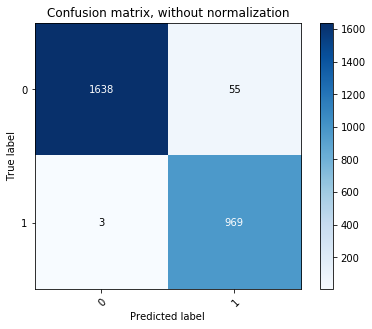

In [22]:
plot_confusion_matrix(y_true, y_test_pred, df_results['y'].cat.categories);

Normalized confusion matrix
[[ 0.96751329  0.03248671]
 [ 0.00308642  0.99691358]]


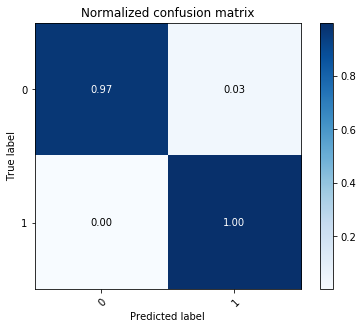

In [23]:
plot_confusion_matrix(y_true, y_test_pred, df_results['y'].cat.categories, normalize=True);

In [24]:
df = pd.DataFrame(y_test_pred)
df.to_csv(output_file, index=False, header=False)